Comparing Gradient Descent with Stochastic Gradient Descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression, SGDRegressor


### Functions and Data

In [3]:
#synthetic dataset y = 3x
np.random.seed(42)
X = pd.DataFrame(np.linspace(0, 10, 100))
y = 2*X + np.random.normal(scale = 5, size = 100).reshape(-1, 1)

In [4]:
#mean squared error function
def mse(theta, X = X, y = y):
    return np.mean((y - theta*X)**2)

In [5]:
#derivative function for mse
def df(theta, X = X, y = y):
    return (mse(theta + 0.001, X = X, y = y) - mse(theta,X = X, y = y))/0.001

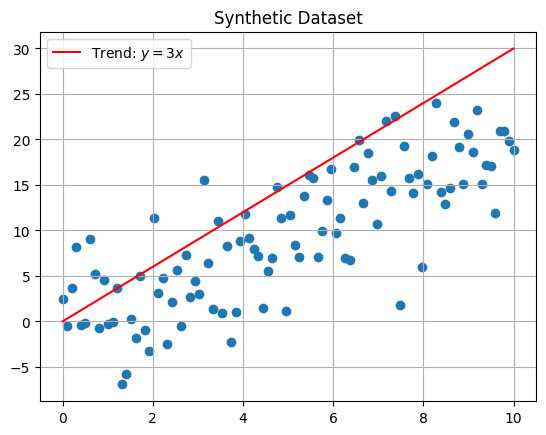

In [9]:
#dataset and "true" line
xs = np.linspace(0, 10, 100)
plt.scatter(X, y)
plt.plot(xs, 3*xs, color = 'red', label = r'Trend: $y = 3x$')
plt.title('Synthetic Dataset')
plt.grid()
plt.legend();


#### Gradient Descent


CPU times: total: 0 ns
Wall time: 0 ns
[np.float64(1.9395118228125376), np.float64(1.9395115667282887), np.float64(1.9395113278025526), np.float64(1.9395111048856428), np.float64(1.9395108969049204)]


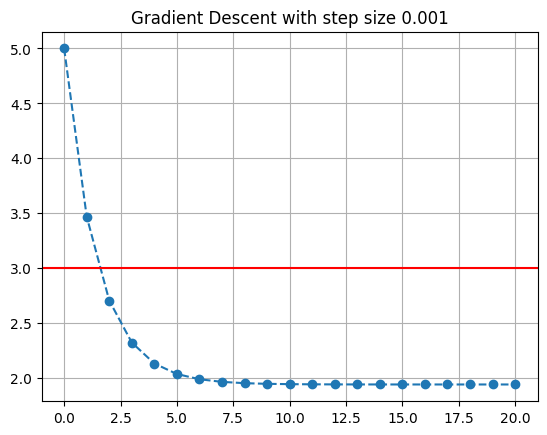

In [14]:

%time
thetas = [5]
for i in range(200):
    # complete the gradient descent update
    theta_next = thetas[-1] - 0.001*df(theta = thetas[-1])
    # //print (type(theta_next))
    thetas.append(theta_next)
    

print(thetas[-5:])
plt.plot(thetas[::10], '--o')
plt.axhline(3, color = 'red')
plt.grid()
plt.title('Gradient Descent with step size 0.001');

#### SGD implementation


CPU times: total: 0 ns
Wall time: 0 ns


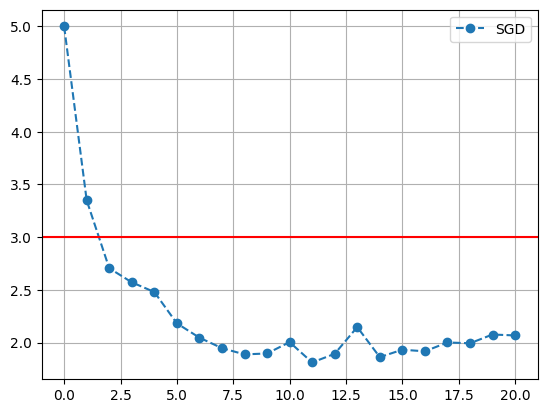

In [18]:
%time
thetas_sgd = [5]
for i in range(200):
    x_sample = X.sample(1, random_state = i)
    y_sample = y.iloc[x_sample.index.values]
    #complete the gradient descent update
    
    theta_next = thetas_sgd[-1] - 0.001*df(theta = thetas_sgd[-1], X = x_sample, y = y_sample)
    thetas_sgd.append(theta_next)
    

plt.plot(thetas_sgd[::10], '--o', label = 'SGD')
plt.axhline(3, color = 'red')
plt.grid()
plt.legend();

#### Comparing Convergence


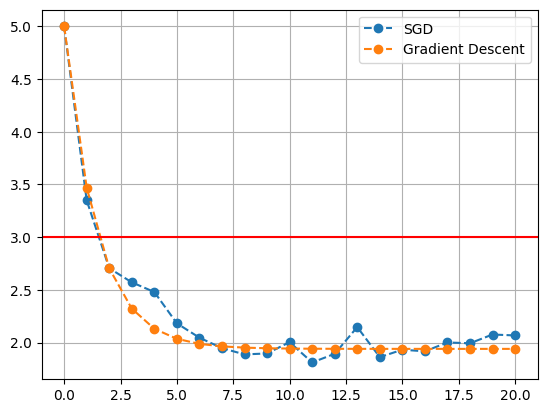

In [17]:
plt.plot(thetas_sgd[::10], '--o', label = 'SGD')
plt.plot(thetas[::10], '--o', label = 'Gradient Descent')
plt.axhline(3, color = 'red')
plt.grid()
plt.legend();